<a href="https://colab.research.google.com/github/Puisque/object-detection/blob/main/Formated_VGG_final_version_of_natural_scene_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount googledrive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Loading Gesture Images from Google Drive
import os 
import torch
import numpy as np
import time

import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import torchvision.models



In [ ]:
# location on Google Drive
master_path = '/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene'

train_dir = os.path.join(master_path, 'train/')
val_dir = os.path.join(master_path, 'validation/')
test_dir = os.path.join(master_path, 'test/')


# **Data Loading**

In [ ]:
def get_data_loader(batch_Size, directory,num_Workers=1):
    """ Loads images
    """
    transform = transforms.Compose([transforms.Resize((224,224)), 
                                    transforms.ToTensor()])
    
    data = datasets.ImageFolder(directory, transform=transform)

    classes = data.classes
  
    indices = list(range(len(data)))

    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(indices)

    data_sampler = SubsetRandomSampler(indices)
    data_loader = torch.utils.data.DataLoader(data, batch_size=batch_Size,
                                               num_workers=num_Workers, sampler=data_sampler)
    
    return data_loader, classes

In [ ]:
train_loader, data_class_train = get_data_loader(1,train_dir, 1)

In [ ]:
print("Training data:", len(train_loader))
print(data_class_train)

Training data: 10494
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
val_loader, data_class_val = get_data_loader(1, val_dir,1)

In [ ]:
print("Val data:", len(val_loader))
print(data_class_val)

Val data: 2622
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
test_loader, data_class_test = get_data_loader(1,test_dir, 1)

In [ ]:
print("Test data:", len(test_loader))
print(data_class_test)

Test data: 2647
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


# **Data Visualization**

In [ ]:
def get_visualization(data_loader,data_class, num_images=20):

  fig = plt.figure(figsize=(25, 4))

  for i,(images,labels) in enumerate(data_loader,0):

    ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[0], (1, 2, 0)))
    ax.set_title(data_class[labels[0]])

    if i >= num_images-1:
        break


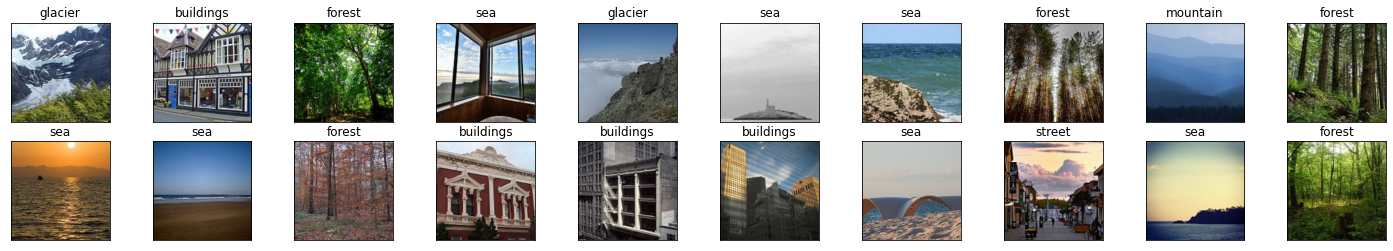

In [ ]:
get_visualization(train_loader,data_class_train,num_images = 20)

# **Transfer learning - Feature Extraction**

In [ ]:
torch.cuda.is_available ()

True

load the AlexNet network, with pretrained weights. PyTorch will download the pretrained weights from the internet.

In [ ]:
vgg19 = torchvision.models.vgg19(pretrained=True)


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


In [ ]:
def features_to_folder(data_loader, master_path, classes):
    # save features to folder as tensors
    n = 0
    for img, label in data_loader:
      features = vgg19.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      for i, img in enumerate(img, 0):
        folder_name = master_path + str(classes[label[i]])
        print(folder_name)
        if not os.path.isdir(folder_name):
          os.makedirs(folder_name)
        torch.save(features_tensor[i], folder_name + '/' + str(n) + '.tensor')
        print(folder_name + '/' + str(n) + '.tensor')
      n += 1

In [ ]:
train_vgg = os.path.join(master_path, 'train_vgg/')
val_vgg = os.path.join(master_path, 'val_vgg/')
test_vgg = os.path.join(master_path, 'test_vgg/')

print(train_vgg)
print(val_vgg)
print(test_vgg)

/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/


In [ ]:
features_to_folder(train_loader, train_vgg, data_class_train)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/street
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/street/7994.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/street
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/street/7995.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/sea
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/sea/7996.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/mountain
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/mountain/7997.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg/glacier
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene

In [ ]:
features_to_folder(val_loader, val_vgg, data_class_val)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/buildings
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/buildings/122.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/sea
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/sea/123.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/sea
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/sea/124.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/sea
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/sea/125.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/street
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg/street/126.tensor
/conte

In [ ]:
features_to_folder(test_loader, test_vgg, data_class_test)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/mountain
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/mountain/147.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/street
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/street/148.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/glacier
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/glacier/149.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/forest
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/forest/150.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg/buildings
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/te

# **Baseline Model**

Try **VGG19 and AlexNet**. Choose the one that has better accuracy for feature extraction.




In [ ]:
def train_base(model, train_loader,valid_loader,batch_size = 32,learning_rate = 0.001,num_epochs = 10):

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  iters, losses, train_acc, val_acc = [], [], [], []

  print ("Training Started...")
  start_time = time.time()

  # training
  for epoch in range(num_epochs):
      print('Epoch ： ', epoch)
      correct = 0
      total = 0
      for features, labels in iter(train_loader):
          #############################################
          #To Enable GPU Usage
          if use_cuda and torch.cuda.is_available():
            features = features.cuda()
            labels = labels.cuda()
          ############################################# 
            
          out = model(features)             # forward pass
          loss = criterion(out, labels) # compute the total loss
          loss.backward()               # backward pass (compute parameter updates)
          optimizer.step()              # make the updates for each parameter
          optimizer.zero_grad()         # a clean up step for PyTorch

          pred = out.max(1, keepdim=True)[1]
          correct += pred.eq(labels.view_as(pred)).sum().item()
          total += features.shape[0]

      # save the current training information
      iters.append(epoch)
      losses.append(float(loss)/batch_size)  # compute *average* loss
      train_acc.append(correct/total) 
      
      val_acc.append(get_accuracy_tp(model, valid_loader))  # compute validation accuracy
      print('Train Accuracy = {}, Validation Accuracy = {}'.format(train_acc[-1], val_acc[-1]))
  

  print('Finished Training')
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

  return losses, train_acc,val_acc,iters, model
    

In [ ]:
# If feature_extract = False, the model is finetuned and all model parameters are updated. 
# If feature_extract = True, only the last layer parameters are updated, the others remain fixed
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
train_loader_b, _= get_data_loader(32,train_dir, 1)
val_loader_b,_  = get_data_loader(32, val_dir,1)

## **AlexNet**

In [ ]:
model_alex = torchvision.models.alexnet(pretrained=True)
set_parameter_requires_grad(model_alex, feature_extracting = True)
num_ftrs = model_alex.classifier[6].in_features
model_alex.classifier[6] = nn.Linear(num_ftrs,6)

use_cuda = True
if use_cuda and torch.cuda.is_available():
  model_alex.cuda()
  print('CUDA is available!')
else:
  print('CUDA is not available.')

losses_alex, train_acc_alex,val_acc_alex,iters_alex,model_alex = train_base(model_alex, train_loader_b,val_loader_b)


CUDA is available!
Training Started...
Epoch ：  0
Train Accuracy = 0.839622641509434, Validation Accuracy = 0.8653699466056446
Epoch ：  1
Train Accuracy = 0.8775490756622832, Validation Accuracy = 0.8607932875667429
Epoch ：  2
Train Accuracy = 0.8825042881646655, Validation Accuracy = 0.8630816170861938
Epoch ：  3
Train Accuracy = 0.8857442348008385, Validation Accuracy = 0.8691838291380626
Epoch ：  4
Train Accuracy = 0.8905088622069754, Validation Accuracy = 0.8604118993135011
Epoch ：  5
Train Accuracy = 0.8901276920144845, Validation Accuracy = 0.8607932875667429
Epoch ：  6
Train Accuracy = 0.8966075852868306, Validation Accuracy = 0.8688024408848207
Epoch ：  7
Train Accuracy = 0.8944158566800077, Validation Accuracy = 0.8733790999237223
Epoch ：  8
Train Accuracy = 0.8947970268724986, Validation Accuracy = 0.8554538520213577
Epoch ：  9
Train Accuracy = 0.8988946064417762, Validation Accuracy = 0.8718535469107551
Finished Training
Total time elapsed: 624.47 seconds


## **VGG19**

In [ ]:
model_vgg19_2 = torchvision.models.vgg19(pretrained=True)
set_parameter_requires_grad(model_vgg19_2, feature_extracting = True)
num_ftrs = model_vgg19_2.classifier[6].in_features
model_vgg19_2.classifier[6] = nn.Linear(num_ftrs,6)

use_cuda = True
if use_cuda and torch.cuda.is_available():
  model_vgg19_2.cuda()
  print('CUDA is available!')
else:
  print('CUDA is not available.')

losses_vgg, train_acc_vgg,val_acc_vgg,iters_vgg,model_vgg = train_base(model_vgg19_2, train_loader_b,val_loader_b)


CUDA is available!
Training Started...
Epoch ：  0
Train Accuracy = 0.8626834381551363, Validation Accuracy = 0.8661327231121282
Epoch ：  1
Train Accuracy = 0.8854583571564704, Validation Accuracy = 0.8699466056445462
Epoch ：  2
Train Accuracy = 0.8893653516295026, Validation Accuracy = 0.8703279938977879
Epoch ：  3
Train Accuracy = 0.8943205641318849, Validation Accuracy = 0.8825324180015256
Epoch ：  4
Train Accuracy = 0.8955593672574804, Validation Accuracy = 0.8871090770404272
Epoch ：  5
Train Accuracy = 0.8947970268724986, Validation Accuracy = 0.8768115942028986
Epoch ：  6
Train Accuracy = 0.8907947398513436, Validation Accuracy = 0.8581235697940504
Epoch ：  7
Train Accuracy = 0.8947017343243758, Validation Accuracy = 0.8604118993135011
Epoch ：  8
Train Accuracy = 0.8955593672574804, Validation Accuracy = 0.872234935163997
Epoch ：  9
Train Accuracy = 0.9016580903373356, Validation Accuracy = 0.8756674294431731
Finished Training
Total time elapsed: 794.77 seconds


## **Result**:

VGG19 has higher accuracy. VGG19 takes longer time. 

The two models has similar classifier, which means VGG19 should performs better in feature extraction. 

# **Architecture**

In [ ]:
class CNN_VGG(nn.Module):
      
    def __init__(self):
        self.name = "CNN_VGG"
        super(CNN_VGG, self).__init__()
        self.conv1 = nn.Conv2d(512, 60, 2) #in_channels, out_chanels, kernel_size
        self.conv2 = nn.Conv2d(60, 10, 2) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(5*5*10, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 6)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 5*5*10)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
class ANN_1(nn.Module):
      
    def __init__(self):
        self.name = "ANN_1"
        super(ANN_1, self).__init__()
        self.fc1 = nn.Linear(512*7*7, 10000)
        self.fc2 = nn.Linear(10000, 5000)
        self.fc3 = nn.Linear(5000, 2500)
        self.fc4 = nn.Linear(2500, 1000)
        self.fc5 = nn.Linear(1000, 6)


    def forward(self, x):
        x = x.view(-1, 512*7*7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
pool = nn.MaxPool2d(2, 2)
test_1 =  nn.Conv2d(512, 60, 2)
x = torch.randn(32,512,7,7)
y = pool(test_1(x))
y.shape

torch.Size([32, 60, 3, 3])

In [ ]:
test_2 =  nn.Conv2d(60, 10, 2)
y = pool(test_2(y))
y.shape

torch.Size([32, 10, 1, 1])

In [ ]:
class CNN_2(nn.Module):
      
    def __init__(self):
        self.name = "CNN_2"
        super(CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(512, 60, 2) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(60, 10, 2) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(2*2*10, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 6)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 2*2*10)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# **Train Model**

In [ ]:
# load features
# location on Google Drive
train_path = '/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_vgg'
valid_path = '/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_vgg'
test_path = '/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_vgg'

# Load data from Google Drive
train_loader1 = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))
val_loader1 = torchvision.datasets.DatasetFolder(valid_path, loader=torch.load, extensions=('.tensor'))
test_loader1 = torchvision.datasets.DatasetFolder(test_path, loader=torch.load, extensions=('.tensor'))

In [ ]:
print(len(train_loader1))
print(len(val_loader1))
print(len(test_loader1))

10494
2622
2647


In [ ]:
torch.cuda.is_available ()

True

In [ ]:
def plot_curve(losses, train_acc,val_acc,iters):
  # plotting
  plt.title("Training Curve")
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()
  plt.title("Training Curve")
  plt.plot(iters, train_acc, label="Train")
  plt.plot(iters, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Training Accuracy")
  plt.legend(loc='best')
  plt.show()

In [ ]:
def get_accuracy_tp(model, data):

    correct = 0
    total = 0
    for imgs, labels in data:
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
               
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


In [ ]:
def train(model, train_dataset,valid_dataset,batch_size = 32,learning_rate = 0.001,num_epochs = 20):

  num_workers = 1
    
  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                            num_workers=num_workers,shuffle=True)
  valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
                                            num_workers=num_workers, shuffle=True)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  iters, losses, train_acc, val_acc = [], [], [], []

  print ("Training Started...")
  start_time = time.time()

  # training
  for epoch in range(num_epochs):
      print('Epoch ： ', epoch)
      total = 0
      correct = 0
      for features, labels in iter(train_loader):
          #############################################
          #To Enable GPU Usage
          if use_cuda and torch.cuda.is_available():
            features = features.cuda()
            labels = labels.cuda()
          ############################################# 
            
          out = model(features)             # forward pass
          loss = criterion(out, labels) # compute the total loss
          loss.backward()               # backward pass (compute parameter updates)
          optimizer.step()              # make the updates for each parameter
          optimizer.zero_grad()         # a clean up step for PyTorch

          pred = out.max(1, keepdim=True)[1]
          correct += pred.eq(labels.view_as(pred)).sum().item()
          total += features.shape[0]

      # save the current training information
      iters.append(epoch)
      losses.append(float(loss)/batch_size)  # compute *average* loss
      # train_acc.append(get_accuracy_tp(model, train_loader, valid_loader, train=True)) # compute training accuracy
      train_acc.append(correct / total) # compute training accuracy
      
      val_acc.append(get_accuracy_tp(model,valid_loader))  # compute validation accuracy
      print('Train Accuracy = {}, Validation Accuracy = {}'.format(train_acc[-1], val_acc[-1]))
  
  
  model_path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, learning_rate, num_epochs)
  torch.save(model.state_dict(), model_path)

  print('Finished Training')
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

  return losses, train_acc,val_acc,iters, model
    

## **Basic Model**

CUDA is available!  Training on GPU ...
Training Started...
Epoch ：  0
Train Accuracy = 0.8349533066514199, Validation Accuracy = 0.8890160183066361
Epoch ：  1
Train Accuracy = 0.911282637697732, Validation Accuracy = 0.8920671243325705
Epoch ：  2
Train Accuracy = 0.9231942062130741, Validation Accuracy = 0.9057971014492754
Epoch ：  3
Train Accuracy = 0.9340575566990661, Validation Accuracy = 0.9088482074752098
Epoch ：  4
Train Accuracy = 0.9510196302649133, Validation Accuracy = 0.8909229595728452
Epoch ：  5
Train Accuracy = 0.9534972365161044, Validation Accuracy = 0.9046529366895499
Epoch ：  6
Train Accuracy = 0.9643605870020965, Validation Accuracy = 0.9084668192219679
Epoch ：  7
Train Accuracy = 0.9680769963788832, Validation Accuracy = 0.8962623951182304
Epoch ：  8
Train Accuracy = 0.9727463312368972, Validation Accuracy = 0.900839054157132
Epoch ：  9
Train Accuracy = 0.9806556127310845, Validation Accuracy = 0.9057971014492754
Epoch ：  10
Train Accuracy = 0.983704974271012, Vali

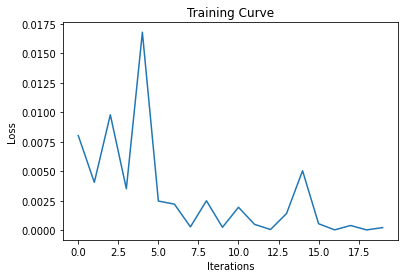

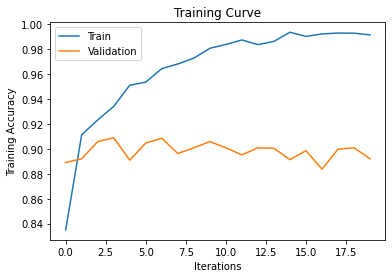

In [ ]:
use_cuda = True
model = CNN_VGG()
# model = model.classifier
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

batch_size=32
learning_rate=0.001
num_epochs=20

losses, train_acc,val_acc,iters,model = train(model, train_loader1,val_loader1,batch_size = batch_size,learning_rate=learning_rate,num_epochs =num_epochs )

plot_curve(losses, train_acc,val_acc,iters)

## **Model Tunning**

Plan:
1. Try VGG19 and ResNet for featrue extraction first
2. Learning rate && batch size && number of epochs
3. Adjust architecture (e.g. # of layers, # of neurons, dropout)

After seeing some improvement in model performance, add early stopping and cross validation 


In [ ]:
use_cuda = True
model_2 = ANN_1()
if use_cuda and torch.cuda.is_available():
  model_2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

batch_size=32
learning_rate=0.001
num_epochs=20

losses_2, train_acc_2,val_acc_2,iters_2,model_2 = train(model_2, train_loader1,val_loader1,batch_size = batch_size,learning_rate=learning_rate,num_epochs =num_epochs )

plot_curve(losses_2, train_acc_2,val_acc_2,iters_2)

CUDA is available!  Training on GPU ...
Training Started...
Epoch ：  0
Train Accuracy = 0.8445778540118163, Validation Accuracy = 0.8806254767353165
Epoch ：  1
Train Accuracy = 0.9241471316943015, Validation Accuracy = 0.8951182303585049
Epoch ：  2
Train Accuracy = 0.9459691252144082, Validation Accuracy = 0.9050343249427918
Epoch ：  3
Train Accuracy = 0.9624547360396417, Validation Accuracy = 0.8859649122807017
Epoch ：  4
Train Accuracy = 0.9673146559939013, Validation Accuracy = 0.8901601830663616
Epoch ：  5
Train Accuracy = 0.9683628740232514, Validation Accuracy = 0.8954996186117468
Epoch ：  6
Train Accuracy = 0.9820850009529255, Validation Accuracy = 0.8897787948131197
Epoch ：  7
Train Accuracy = 0.9838002668191348, Validation Accuracy = 0.8951182303585049
Epoch ：  8
Train Accuracy = 0.9860872879740804, Validation Accuracy = 0.8939740655987796
Epoch ：  9
Train Accuracy = 0.994568324757004, Validation Accuracy = 0.898932112890923
Epoch ：  10
Train Accuracy = 0.9935201067276539, Val

KeyboardInterrupt: ignored

In [ ]:
use_cuda = True
model_3 = CNN_2()
if use_cuda and torch.cuda.is_available():
  model_3.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

batch_size=32
learning_rate=0.001
num_epochs=20

losses_3, train_acc_3,val_acc_3,iters_3,model_3 = train(model_3, train_loader1,val_loader1,batch_size = batch_size,learning_rate=learning_rate,num_epochs =num_epochs )


CUDA is available!  Training on GPU ...
Training Started...
Epoch ：  0
Train Accuracy = 0.8156089193825042, Validation Accuracy = 0.8928299008390541
Epoch ：  1
Train Accuracy = 0.9146178768820278, Validation Accuracy = 0.8958810068649885
Epoch ：  2
Train Accuracy = 0.9288164665523156, Validation Accuracy = 0.8958810068649885
Epoch ：  3
Train Accuracy = 0.9417762530970079, Validation Accuracy = 0.9038901601830663
Epoch ：  4
Train Accuracy = 0.9554983800266819, Validation Accuracy = 0.9054157131960335
Epoch ：  5
Train Accuracy = 0.9658852677720602, Validation Accuracy = 0.8920671243325705
Epoch ：  6
Train Accuracy = 0.9752239374880884, Validation Accuracy = 0.8794813119755912
Epoch ：  7
Train Accuracy = 0.980465027634839, Validation Accuracy = 0.8874904652936689
Epoch ：  8
Train Accuracy = 0.9805603201829617, Validation Accuracy = 0.8863463005339436
Epoch ：  9
Train Accuracy = 0.989517819706499, Validation Accuracy = 0.8901601830663616
Epoch ：  10
Train Accuracy = 0.9901848675433581, Val

NameError: ignored

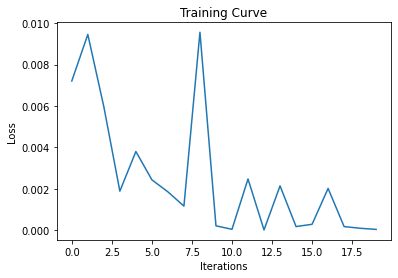

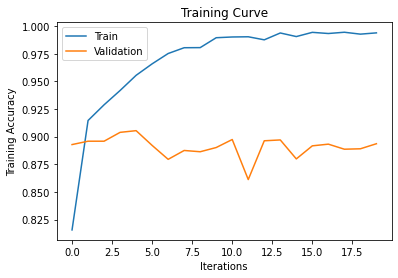

In [ ]:
plot_curve(losses_3, train_acc_3,val_acc_3,iters_3)

## Test Accuracy 

In [ ]:
num_workers = 1
test_loader = torch.utils.data.DataLoader(test_loader1, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)


In [ ]:
def get_test_accuracy(model, test_loader):
    data = test_loader
    correct = 0
    total = 0
    for features, labels in data:
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          features = features.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(features)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += features.shape[0]
    return correct / total


In [ ]:

test_accuracy = get_test_accuracy(model, test_loader)

print("test accuracy:", test_accuracy)

test accuracy: 0.887797506611258
